<IPython.core.display.Javascript object>


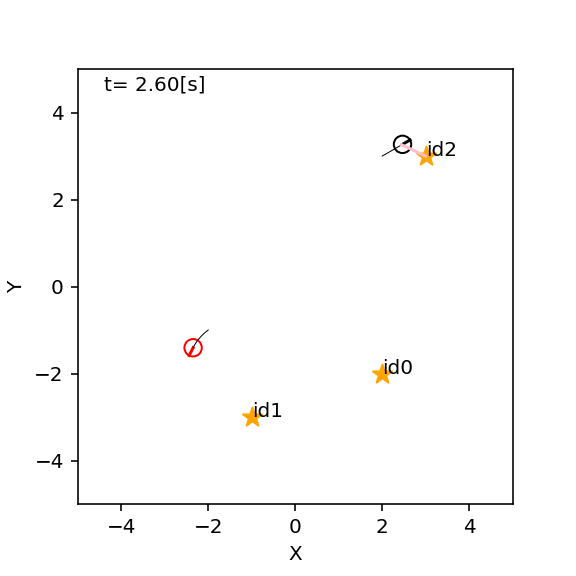

In [1]:
import sys
sys.path.append('../scripts/')
from kld_mcl import*

In [17]:
class GlobalKldMcl(KldMcl):
    def __init__(self, envmap, max_num, motion_noise_stds = {"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},
                distance_dev_rate = 0.14, direction_dev = 0.05):
        super().__init__(envmap, np.array([0,0,0]).T, max_num, motion_noise_stds, distance_dev_rate, direction_dev)
        self.particles = [Particle(None, 1.0 / max_num) for i in range(max_num)]
        # 粒子をばらまく
        for p in self.particles:
            p.pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
        
        self.observed = False # 観測のあるときはTrueにして無駄なKLDをなくす
        
    def motion_update(self, nu, omega, time):
        if not self.observed and len(self.particles) == self.max_num:
            for p in self.particles: p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
            return
        
        super().motion_update(nu, omega, time)
        
    def observation_update(self, observation):
        super().observation_update(observation)
        self.observed = len(observation) > 0

<IPython.core.display.Javascript object>


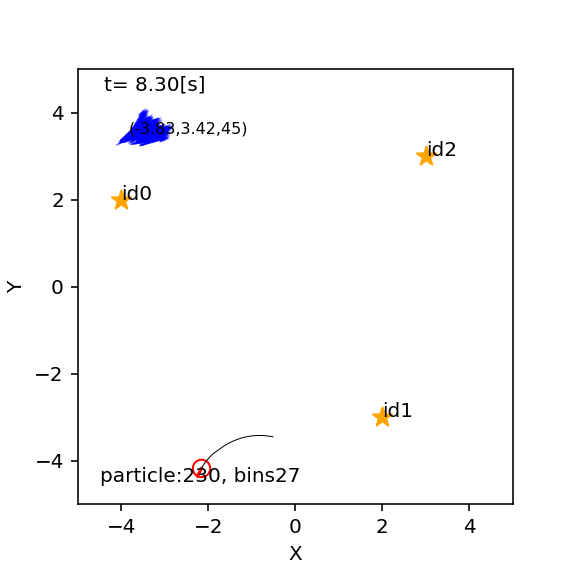

(array([-0.51198674, -3.45530775,  2.93489362]), array([0, 0, 0]))

In [34]:
def trial(animation):
    time_interval = 0.1
    world = World(30,time_interval,debug = not animation)
    
    m = Map()
    for ln in [(-4, 2), (2,-3),(3,3)]: m.append_landmark(Landmark(*ln))
    world.append(m)
    
    initial_pose = np.array([np.random.uniform(-5.0, 5.0), np.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
    pf = GlobalKldMcl(m,  1000)
    a = EstimationAgent(time_interval,0.2,10.0 / 180 * math.pi, pf)
    r = Robot(initial_pose,sensor = Camera(m),agent = a,color = "red") # このカメラ、ファントム、オクルージョン...全部込み込み
    world.append(r)
    
    world.draw()
    return (r.pose, pf.ml.pose)
trial(True)